In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from IPython.display import VimeoVideo
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [2]:
def wrangle(filename):
    # Import csv
    df = pd.read_csv(filename)

    # Remove spaces in between columns names
    df.columns = df.columns.str.replace(" ", "_")
   
    return df

In [3]:
# Import data into dataframe
df = wrangle("data/companybankrupt.csv")
print(df.shape)

(6819, 96)


In [4]:
# Check the information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   _Operating_Gross_Margin                                   6819 non-null   float64
 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   _Operating_Profit_Rate                                    6819 non-null   float64
 7   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   _After-tax_net_Int

In [5]:
# Check the value counts of the target
df["Bankrupt?"].value_counts(normalize=True)

Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64

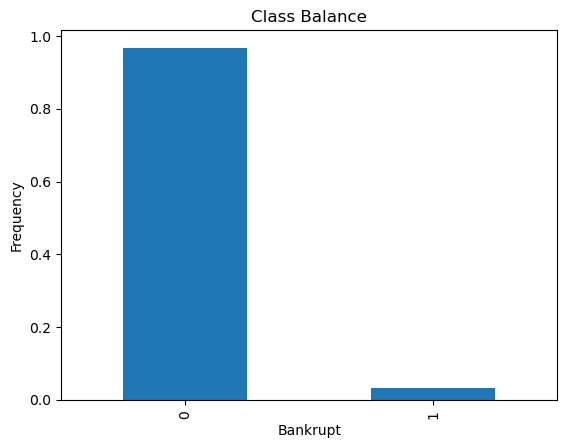

In [6]:
# Plot the class balance
df["Bankrupt?"].value_counts(normalize=True).plot(
    kind= "bar",
    xlabel= "Bankrupt",
    ylabel="Frequency",
    title = "Class Balance"
);

In [7]:
# Get the correllation between features
corr = df.drop(columns = "Bankrupt?").corr()
corr

,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
_ROA(C)_before_interest_and_depreciation_before_interest,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
_ROA(A)_before_interest_and_%_after_tax,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
_ROA(B)_before_interest_and_depreciation_after_tax,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,0.052261,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
_Operating_Gross_Margin,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,0.029430,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
_Realized_Sales_Gross_Margin,0.332755,0.324956,0.331755,0.999518,1.000000,0.005610,0.032232,0.026851,0.051242,0.029166,...,0.298155,0.022750,0.004038,0.999518,0.074891,-0.085407,-0.011268,-0.001158,NaN,0.120196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_Liability_to_Equity,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,-0.002996,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
_Degree_of_Financial_Leverage_(DFL),-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,0.000774,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,0.000798,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
_Net_Income_Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


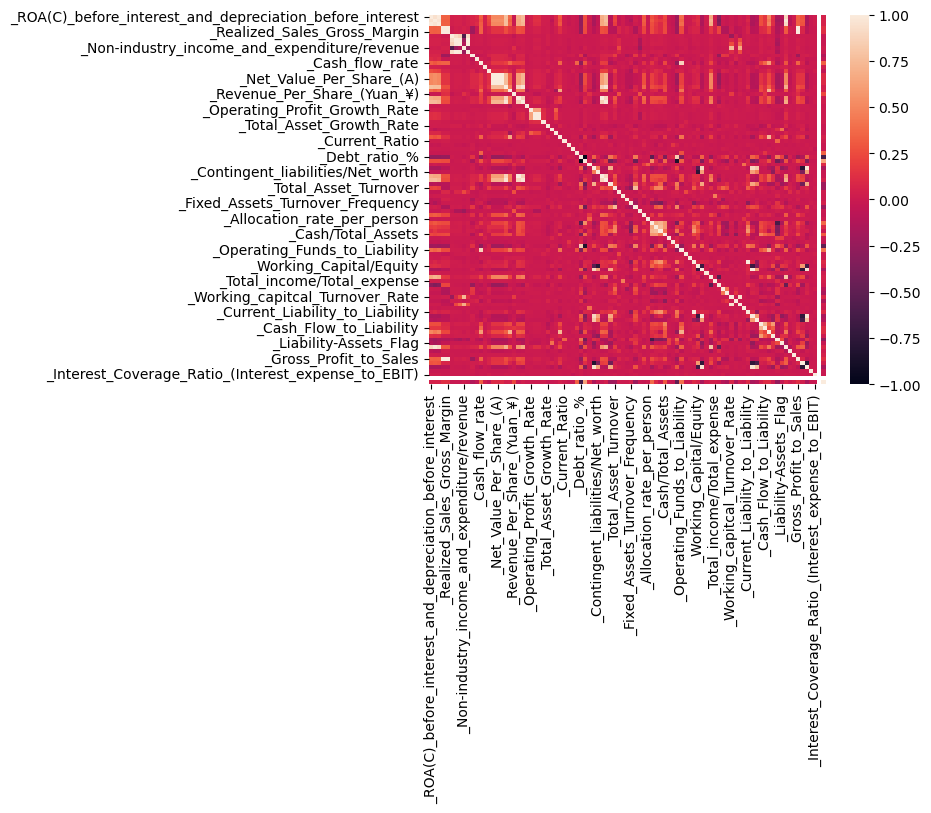

In [8]:
# Plot the correlation between the features using seaborn
sns.heatmap(corr);

In [9]:
df["_Current_Ratio"].head()

0    0.002259
1    0.006016
2    0.011543
3    0.004194
4    0.006022
Name: _Current_Ratio, dtype: float64

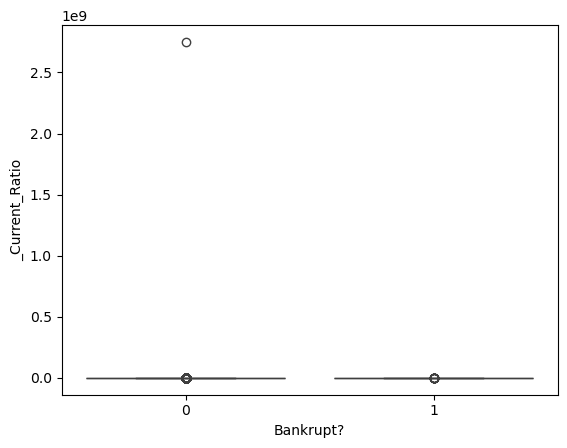

In [10]:
# Show relationship bewteen current ratio and bankrupt
sns.boxplot(y= df["_Current_Ratio"], x= df["Bankrupt?"]);

In [11]:
# check the statistical detail of current ratio
df["_Current_Ratio"].describe().apply("{0:,.0f}".format)

count            6,819
mean           403,285
std         33,302,156
min                  0
25%                  0
50%                  0
75%                  0
max      2,750,000,000
Name: _Current_Ratio, dtype: object

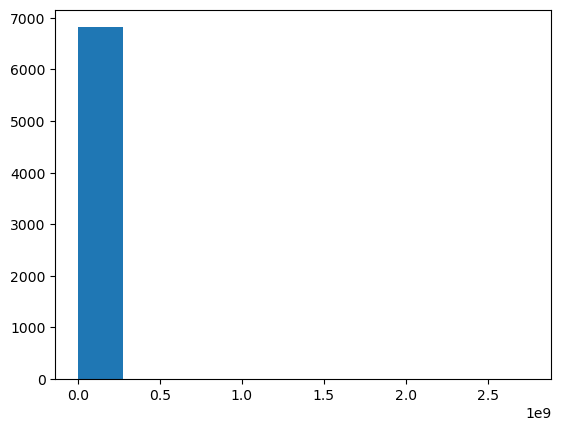

In [12]:
# Plot the histogram distribution of current ratio
plt.hist(df["_Current_Ratio"]);

In [13]:
df.head()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [14]:
# Split data into features and target
target = "Bankrupt?"
X = df.drop(columns="Bankrupt?")
y = df[target]

In [15]:
# Split data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


In [16]:
# Resample data
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


In [17]:
# Set baseline accuracy
Baseline_Accuracy = y_train.value_counts(normalize=True).max()
Baseline_Accuracy

0.969019248395967

In [18]:
# Instatiate a Randomforestclassifier
clf = RandomForestClassifier(random_state=42)
clf

RandomForestClassifier(random_state=42)

In [19]:
# Get the accuracy score for the cross validation
cv_acc_score = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_score)

[0.99196217 0.99479905 0.99479659 0.99668874 0.99479659]


In [20]:
params ={
    "n_estimators": range(25, 100, 25),
    "max_depth": range(10, 50, 10)
}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 50, 10)}

In [21]:
# Build GridSearchCV model
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [22]:
# fit model to training 
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 50, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [23]:
# Extract the cross validation result
cv_result = pd.DataFrame(model.cv_results_)
cv_result.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.543545,0.133067,0.022159,0.004123,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.978251,0.978251,0.982025,0.979186,0.979659,0.979474,0.001387,11
1,2.883999,0.165545,0.029683,0.010388,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.979196,0.979669,0.980605,0.979659,0.980605,0.979947,0.000564,10
2,5.169089,1.045196,0.066967,0.031191,10,75,"{'max_depth': 10, 'n_estimators': 75}",0.978723,0.979196,0.980132,0.979659,0.979659,0.979474,0.000478,12
3,2.288777,0.462963,0.030853,0.005411,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.985343,0.986288,0.989593,0.987701,0.988174,0.987420,0.001481,9
4,4.859859,0.703670,0.047933,0.016001,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.986761,0.987234,0.990066,0.988647,0.987228,0.987987,0.001217,8


In [24]:
#mask = cv_result["param_max_depth"] == 10
#cv_result[mask]

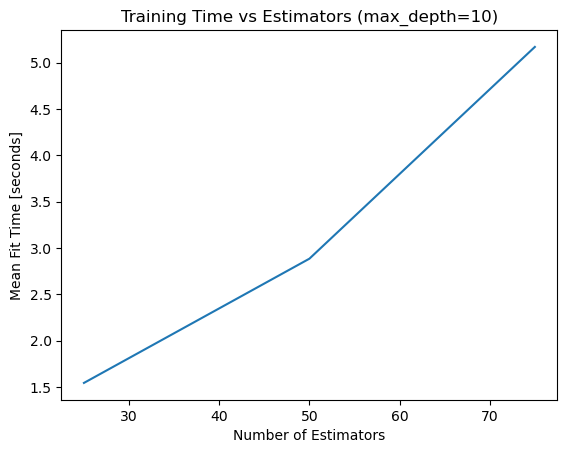

In [25]:
# show the relationship betweeen the training time and number of estimators holding max depth constant at 10
# Create a mask
mask = cv_result["param_max_depth"] == 10
#
plt.plot(
    cv_result[mask]["param_n_estimators"],
    cv_result[mask]["mean_fit_time"]
)
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

In [26]:
#mask = cv_result["param_n_estimators"] == 25
#cv_result[mask]

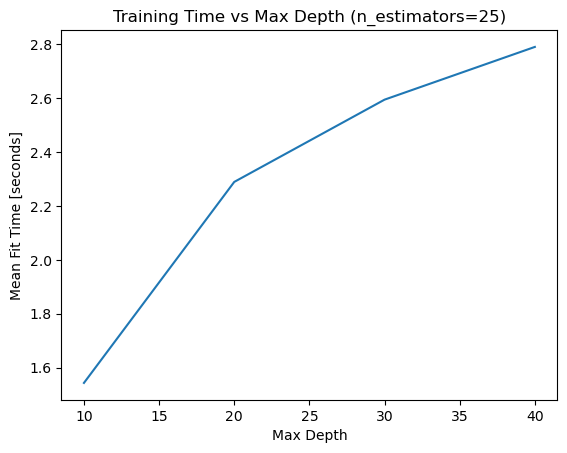

In [27]:
# show the relationship betweeen the training time and max depth holding no of estimators at 25
# Create a mask
mask = cv_result["param_n_estimators"] == 25
#
plt.plot(
    cv_result[mask]["param_max_depth"],
    cv_result[mask]["mean_fit_time"]
)


# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

In [35]:
# Extract the best hyperparameter
model.best_params_

{'max_depth': 40, 'n_estimators': 50}

In [36]:
# Extract the best score
model.best_score_

np.float64(0.9944194171022408)

In [37]:
# Extract the best estimator
model.best_estimator_

RandomForestClassifier(max_depth=40, n_estimators=50, random_state=42)

In [38]:
# prediction with the training data
model.predict(X_train_over)

array([0, 0, 0, ..., 1, 1, 1], shape=(10572,))

    Evaluation

In [44]:
# The training and test accuracy score
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print(f"Training Accuracy:", round(acc_train, 2))
print(f"Test Accuracy:", round(acc_test, 2))

Training Accuracy: 1.0
Test Accuracy: 0.97


Lets see how our model perform with test data using confusion Matrix

In [55]:
y_test.value_counts()

Bankrupt?
0    1313
1      51
Name: count, dtype: int64

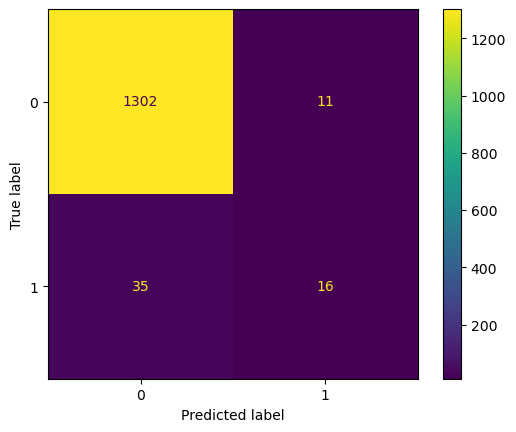

In [51]:
# Plot confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

    Communication

In [70]:

importances

array([0.01454976, 0.02441449, 0.02766317, 0.00319901, 0.00553291,
       0.00519517, 0.02622797, 0.01113857, 0.01718647, 0.03431998,
       0.00364167, 0.00400841, 0.00420609, 0.00667445, 0.01200997,
       0.00776102, 0.01122943, 0.00506013, 0.03602189, 0.00231088,
       0.00439928, 0.00365106, 0.00478981, 0.00512176, 0.00466164,
       0.00646622, 0.00323628, 0.00444573, 0.00478204, 0.0196645 ,
       0.00229111, 0.00289874, 0.00517727, 0.00963453, 0.01600318,
       0.04331067, 0.01839378, 0.01620842, 0.00378826, 0.05099737,
       0.00254384, 0.00432251, 0.01500657, 0.00352695, 0.00576767,
       0.00933349, 0.0086765 , 0.00291899, 0.00333484, 0.00342661,
       0.00370481, 0.00685899, 0.00453475, 0.00434546, 0.0068895 ,
       0.00381859, 0.0052464 , 0.00472848, 0.00389766, 0.0030342 ,
       0.00456167, 0.00935902, 0.00451868, 0.00293162, 0.00547422,
       0.0119472 , 0.0040692 , 0.05212195, 0.04928722, 0.00290314,
       0.00476213, 0.00573159, 0.00294941, 0.00676178, 0.00600

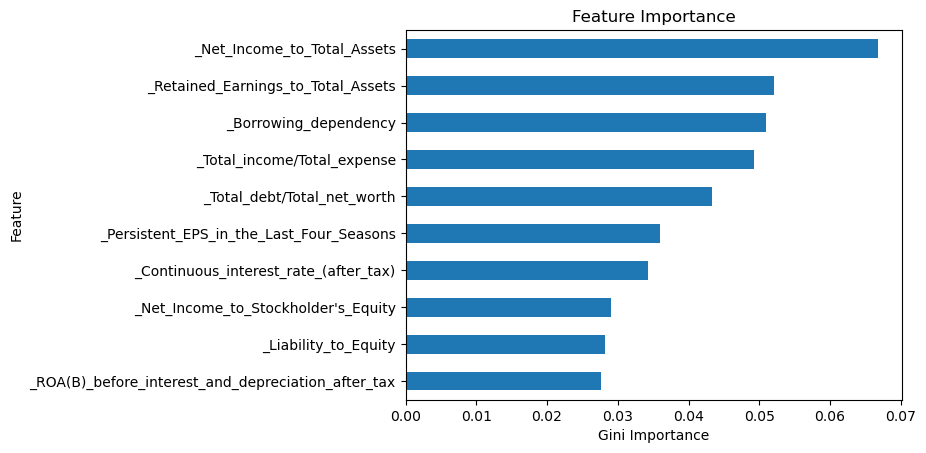

In [74]:
# Get feature names from training data
features = X_train.columns

# Extract importances from model
importances = model.best_estimator_.feature_importances_

# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()

# plot 10 most importance features
feat_imp.tail(10).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");